In [1]:
import pandas as pd
import matplotlib as mplot

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 10

### Arquivos extraídos do Microdados INEP

In [4]:
file_resp = '../dados/TS_ITEM.csv'
file_alunos_3EM_ESC = '../dados/TS_ALUNO_3EM_ESC.csv'
# file_alunos_3EM_AG = '../dados/TS_ALUNO_3EM_AG.csv'
file_alunos_9EF = '../dados/TS_ALUNO_9EF.csv'
file_alunos_5EF = '../dados/TS_ALUNO_5EF.csv'

### Conjunto Definido de Colunas à Serem Utilizadas

In [5]:
RESPOSTAS_INVALIDAS = ['X', '.', '*', ' ', '']

##### Identificadores das Colunas

In [6]:
ID_SERIE = 'ID_SERIE'
TIPO_PROVA = 'TIPO_PROVA'
DISCIPLINA = 'DISCIPLINA'
ID_SERIE_ITEM = 'ID_SERIE_ITEM'
ID_BLOCO = 'ID_BLOCO'
ID_POSICAO = 'ID_POSICAO'
GABARITO = 'GABARITO'
ID_PROVA_BRASIL = 'ID_PROVA_BRASIL' # Ano da Prova, pode ser ignorado, pois os arquivos são baixados por ano
ID_UF = 'ID_UF'
ID_MUNICIPIO = 'ID_MUNICIPIO'

##### Preenchimento Prova

In [7]:
ID_ALUNO = 'ID_ALUNO'
IN_PREENCHIMENTO_PROVA = 'IN_PREENCHIMENTO_PROVA'
IN_PRESENCA_PROVA = 'IN_PRESENCA_PROVA'
ID_REGIAO = 'ID_REGIAO'
ID_AREA = 'ID_AREA'

##### Respostas da Prova

In [8]:
ID_BLOCO_1 = 'ID_BLOCO_1'
ID_BLOCO_2 = 'ID_BLOCO_2'
TX_RESP_BLOCO_1_LP = 'TX_RESP_BLOCO_1_LP'
TX_RESP_BLOCO_2_LP = 'TX_RESP_BLOCO_2_LP'
TX_RESP_BLOCO_1_MT = 'TX_RESP_BLOCO_1_MT'
TX_RESP_BLOCO_2_MT = 'TX_RESP_BLOCO_2_MT'

##### Proeficiência do ALuno

In [9]:
PESO_ALUNO_LP = 'PESO_ALUNO_LP'
PESO_ALUNO_MT = 'PESO_ALUNO_MT'
PROFICIENCIA_LP = 'PROFICIENCIA_LP'
ERRO_PADRAO_LP = 'ERRO_PADRAO_LP'
PROFICIENCIA_LP_SAEB = 'PROFICIENCIA_LP_SAEB'
ERRO_PADRAO_LP_SAEB = 'ERRO_PADRAO_LP_SAEB'
PROFICIENCIA_MT = 'PROFICIENCIA_MT'
ERRO_PADRAO_MT = 'ERRO_PADRAO_MT'
PROFICIENCIA_MT_SAEB = 'PROFICIENCIA_MT_SAEB'
ERRO_PADRAO_MT_SAEB = 'ERRO_PADRAO_MT_SAEB'

##### Questionário Socioeconômico

In [10]:
IN_PREENCHIMENTO_QUESTIONARIO = 'IN_PREENCHIMENTO_QUESTIONARIO'
TX_RESP_Q001 = 'TX_RESP_Q001' # Sexo
TX_RESP_Q002 = 'TX_RESP_Q002' # Cor/Raça

In [11]:
colunas_resp = [
    ID_SERIE, TIPO_PROVA, DISCIPLINA,
    ID_SERIE_ITEM, ID_BLOCO, ID_POSICAO,
    GABARITO
]

In [12]:
colunas_aluno = [
    ID_UF, ID_MUNICIPIO, ID_REGIAO, ID_AREA,
    ID_SERIE, IN_PREENCHIMENTO_PROVA,
    ID_BLOCO_1, ID_BLOCO_2,
    TX_RESP_BLOCO_1_LP, TX_RESP_BLOCO_2_LP,
    TX_RESP_BLOCO_1_MT, TX_RESP_BLOCO_2_MT,
    PROFICIENCIA_LP,
    PROFICIENCIA_MT,
    TX_RESP_Q001,
    TX_RESP_Q002
]

### Arquivos

#### Gabarito, 666 itens corrigidos (+36KB)

#### 5SEM,     2.624.019 provas (+360MB)
#### 9SEM,     2.341.459 provas (+321MB)
#### 3SEMAG,   1.966.507 provas (+270MB)
###### 3SEMESC,  1.456.325 provas (+200MB)

In [13]:
df_gabarito = pd.read_csv(
    file_resp,
    delimiter=';', encoding='iso-8859-1',
    usecols=colunas_resp,
    # low_memory=True
)

In [14]:
df_gabarito.sample(10)

,ID_SERIE,TIPO_PROVA,DISCIPLINA,ID_SERIE_ITEM,ID_BLOCO,ID_POSICAO,GABARITO
624,9,Prova Regular,MT,9,6,11,D
172,3,Prova Regular,MT,3,5,4,E
341,5,Prova Regular,MT,5,1,9,B
236,5,Prova Regular,LP,5,1,3,B
444,9,Prova Regular,LP,9,1,13,C
556,9,Prova Regular,MT,5,1,8,C
661,9,Macrotipo 18 e 24,MT,5,2,9,B
354,5,Prova Regular,MT,5,2,11,B
356,5,Prova Regular,MT,5,3,2,A
502,9,Prova Regular,LP,9,6,6,C


In [15]:
df_gabarito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 7 columns):
ID_SERIE         666 non-null int64
TIPO_PROVA       666 non-null object
DISCIPLINA       666 non-null object
ID_SERIE_ITEM    666 non-null int64
ID_BLOCO         666 non-null int64
ID_POSICAO       666 non-null int64
GABARITO         666 non-null object
dtypes: int64(4), object(3)
memory usage: 36.5+ KB


Geralmente 15 segundos para carregar o conjunto de dados selecionado

In [16]:
df_aluno_5EF = pd.read_csv(
    file_alunos_5EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True, 
    nrows=20000  # Para fazer testes com os dados
)

In [17]:
df_aluno_9EF = pd.read_csv(
    file_alunos_9EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    nrows=20000  # Para fazer testes com os dados
)

In [18]:
# df_aluno_3EM_AG = pd.read_csv(
#     file_alunos_3EM_AG,
#     delimiter=',', encoding='iso-8859-1',
#     usecols=colunas_aluno,
#     low_memory=True, 
# )

In [19]:
df_aluno_3EM = pd.read_csv(
    file_alunos_3EM_ESC,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    nrows=20000  # Para fazer testes com os dados
)

In [20]:
df_aluno_5EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
7638,1,11,1100122,2,5,0,5,6,...........,...........,...........,...........,NaN,NaN,NaN,NaN
15821,1,11,1100205,1,5,0,7,3,...........,...........,...........,...........,NaN,NaN,NaN,NaN
1451,1,11,1100023,2,5,1,5,1,DBBCDBCADCA,BBBACAAABBD,ABBCDDCDDBA,DDADACDAAAD,-1.305695,-0.704222,A,B
19917,1,11,1100304,2,5,1,3,6,DDADBDDCBCA,ADADBBADCBD,CAAABBCCBCB,CCBBBBDDDBC,-0.579400,-0.300392,B,E
16277,1,11,1100205,1,5,1,7,3,BBDDDBBADCD,DDADCCDCAAA,CCDBBCBCDDD,AAADDACDDBB,-0.551727,-1.378113,B,B
17697,1,11,1100205,1,5,1,2,5,DAABACCCDCC,DCBCDDBCDBA,BDAADAABBAA,ADBCDDCCCDA,-1.078130,-0.864647,B,D
11423,1,11,1100205,1,5,1,4,5,ACCDAADBDCC,DCACDBBBCCC,BBACCADDDDD,ABBCDACCCCB,-1.277776,0.017088,A,C
5908,1,11,1100114,2,5,1,7,1,BBCAADBABAD,BCCBBCBADBD,CCCCBDBBDCC,DDABCBAABCD,-0.784978,-0.636339,B,C
12912,1,11,1100205,1,5,1,1,3,BCBDBAABBBA,CCBDACBCABA,DACDCBADDDC,AAACBADACCB,-1.089045,-1.129357,A,A
4901,1,11,1100106,2,5,1,3,4,DAADBDACADA,BCCBAADDBDB,CAAAAACCBCB,BDADABBDCDC,-0.327517,-0.245061,B,C


In [21]:
df_aluno_9EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
4432,1,11,1100106,2,9,1,7,3,ACDBCBCABDAAB,CBDCBCDDCBBBB,DABCABCBADDCC,BBACBCADACACC,-0.587859,-0.540594,A,B
1239,1,11,1100023,2,9,1,3,5,CBDDDACADCCCD,BDDAACDCCBDBB,DBBCBDBDADABA,CCBDDADCCDCAB,-0.378218,0.579617,A,B
15138,1,11,1100254,2,9,1,3,5,CBCDDACAACDAD,AACCBCACBBAAD,DBBDCABDABCDA,BDBBCCDCBBCBB,-0.547294,-0.234905,B,A
7566,1,11,1100130,2,9,0,7,1,.............,.............,.............,.............,NaN,NaN,NaN,NaN
9640,1,11,1100205,1,9,1,4,5,DDADCBBADDBCB,BCDCBAADCBBAB,BBBBBACBDDDDD,CCCDBBDBCACBC,1.706745,0.112309,A,B
2939,1,11,1100064,2,9,0,4,7,.............,.............,.............,.............,NaN,NaN,NaN,NaN
8200,1,11,1100155,2,9,1,3,5,ABDDAACABBCCD,BDDBBCADABCCB,DBACDCBCAADCD,CDBDDDDBCBCAB,-0.065614,1.305092,A,D
2064,1,11,1100049,2,9,1,5,6,BCDCAADDCCBAB,BAACBCCDCBBBD,CDDADCDCBCCAC,CDDACAAADBBDB,0.651702,-0.642316,B,C
16917,1,11,1100304,2,9,1,7,3,AACBCBCBBAACD,CBDDCACABACAD,BCBCBDDDDACBA,DBBCADCDACDBA,0.722408,-0.160217,A,NaN
15605,1,11,1100288,2,9,0,6,1,.............,.............,.............,.............,NaN,NaN,NaN,NaN


In [22]:
df_aluno_3EM.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
18545,1,12,6305526,1,12,1,5,1,BAEDCEDDADEAA,BCADCDABDBECD,AABEDBDCDECBD,CEDEBCDCDDBEA,0.933554,2.257627,A,F
19919,1,13,1300300,2,12,1,3,5,ADCBDEBBCCBBC,CACABBBDCBCAB,BBABABDAACCBE,CCCEECACDBACA,-1.302691,-0.675411,B,C
9230,1,11,1100809,2,12,1,6,7,BEEDEABCBEDBE,DCBCEDCCCCDCC,BEAEEABABCECC,DBBAAACCABAAC,0.852211,1.322974,B,A
2453,1,11,1100114,2,12,1,5,7,BCBABEABCEEAB,DEBCADCCCAEBC,ACBEEBBCDBEBC,BACDABCDDBADB,-0.416353,-0.011424,B,A
13434,1,12,1200328,2,12,1,7,3,DCABEDACCCCCC,CBEBEEDDABEAD,ABAAABCDCDBCD,ECADAACCBDCAD,1.415300,1.265811,A,C
6466,1,11,1100205,1,12,1,4,5,ADACCEABCBEBA,CCBAADDDCDCAB,CEDCCABAAEBEB,ACDEABBCDCDDA,0.067918,0.245178,A,A
10519,1,11,1101757,2,12,1,5,1,BAEDBEDDADEEE,BCADEECBBBECD,ACBEBBDCBCABD,CDDEBBDBDBDCA,0.873151,1.557053,A,C
15658,1,12,1200401,1,12,1,2,5,CADAECDAACEBE,CCBACDBAACAAD,DBAECCDACCCBB,ACBEADDCDAEBA,-0.305286,1.128441,A,C
13637,1,12,1200336,2,12,1,6,2,AEEACDAACEDCB,DBDADCABDBCAD,ECAAEDCCBDECD,BBADCBDACACCC,-0.487578,-0.527457,A,C
12827,1,12,1200203,2,12,1,6,7,BBCABADBAAABD,ACAAAADACCEAA,ACAEABAADDAAD,DDCDDDBAAEABA,-1.105462,-1.150974,B,A


### Após o carregamento, o DataFrame tem suas colunas reorganizadas, logo:

In [23]:
colunas_aluno = list(df_aluno_5EF.columns.values)

### Série

In [24]:
idx_serie_gab = colunas_resp.index(ID_SERIE)
idx_serie_aluno = colunas_aluno.index(ID_SERIE)

### Respostas

In [25]:
idx_disciplina = colunas_resp.index(DISCIPLINA)
idx_posicao_gabarito = colunas_resp.index(ID_POSICAO)
idx_gabarito = colunas_resp.index(GABARITO)
idx_preenchimento_prova = colunas_aluno.index(IN_PREENCHIMENTO_PROVA)

### Blocos

In [26]:
bloco_gab = colunas_resp.index(ID_BLOCO) 
bloco_resp_1 = colunas_aluno.index(ID_BLOCO_1)
bloco_resp_2 = colunas_aluno.index(ID_BLOCO_2)
aluno_resp_bloco_1_lp = colunas_aluno.index(TX_RESP_BLOCO_1_LP) 
aluno_resp_bloco_2_lp = colunas_aluno.index(TX_RESP_BLOCO_2_LP) 
aluno_resp_bloco_1_mt = colunas_aluno.index(TX_RESP_BLOCO_1_MT) 
aluno_resp_bloco_2_mt = colunas_aluno.index(TX_RESP_BLOCO_2_MT) 

### Região de Estudo/Aluno

In [27]:
idx_uf = colunas_aluno.index(ID_UF)
idx_municipio = colunas_aluno.index(ID_MUNICIPIO)
idx_regiao = colunas_aluno.index(ID_REGIAO)
idx_area = colunas_aluno.index(ID_AREA)
idx_sexo = colunas_aluno.index(TX_RESP_Q001)
idx_raca = colunas_aluno.index(TX_RESP_Q002)

## Cálculo de Acertos

### **Numeração dos Estados, Regiões etc..**
_Descrita no Dicionário da ANEB_

In [28]:
num_estados = {
    11: 'RO',
    12: 'AC',
    13: 'AM',
    14: 'RR',
    15: 'PA',
    16: 'AP',
    17: 'TO',
    21: 'MA',
    22: 'PI',
    23: 'CE',
    24: 'RN',
    25: 'PB',
    26: 'PE',
    27: 'AL',
    28: 'SE',
    29: 'BA',
    31: 'MG',
    32: 'ES',
    33: 'RJ',
    35: 'SP',
    41: 'PR',
    42: 'SC',
    43: 'RS',
    50: 'MS',
    51: 'MT',
    52: 'GO',
    53: 'DF'
}

In [29]:
num_regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

In [30]:
num_cor = {
    'A': 'Branca',
    'B': 'Preta',
    'C': 'Parda',
    'D': 'Amarelo',
    'E': 'Indígena',
    'F': 'Não quero declarar',
}

In [31]:
num_sexo = {
    'A': 'Masculino',
    'B': 'Feminino'
}

In [32]:
filtro_de_colunas_resposta = ['serie', 'nota_lp', 'nota_mt', 'uf', 'municipio', 'regiao', 'area', 'sexo', 'raca']

In [33]:
def filtrar_dados(serie_dados, nao_realizado=0, colunas=filtro_de_colunas_resposta):
    """
    
    :param serie_dados:     Série de dados carregados (DataFrame)
    :param nao_realizado:   Número de ocorrências do Não Preenchimento de Prova
    :param colunas:         Filtro de Colunas à serem aplicadas ao resultado de serie_dados
    :param resposta_dados:  DataFrame de resposta, caso não seja vazio, os dados serão adicionados a ele 
    :return: 
        Dados Filtrado (DataFrame)
        Quantidade não realizada de provas
    """
    resposta_dados = []
    i = 0
    for r in serie_dados.to_numpy():  # [len(serie_dados.to_numpy())//2:]:
        i = i + 1
        not_lim = 1000
        if 0 == i % not_lim:
            print(f'iter {not_lim}, resp: {len(resposta_dados)}, {nao_realizado} => {len(resposta_dados) + nao_realizado}')
        
        nota_mt = 0
        nota_pt = 0
        
        respostas_lp = [
            [False for x in range(len(r[aluno_resp_bloco_1_lp]))],
            [False for x in range(len(r[aluno_resp_bloco_2_lp]))]
        ]
        respostas_mt = [
            [False for x in range(len(r[aluno_resp_bloco_1_mt]))],
            [False for x in range(len(r[aluno_resp_bloco_2_mt]))]
        ]
        
        # Quem não fez a prova é ignorado
        if not bool(int(r[idx_preenchimento_prova])):
            nao_realizado = nao_realizado + 1
            continue
        serie_aluno = r[idx_serie_aluno]
        if serie_aluno in (12, 13):
            # 12 - 3ª ou 4ª Série do Ensino Médio
            # 13 - 3ª ou 4ª Série do Ensino Médio Integrado
            serie_aluno = 3
        for gab in df_gabarito.to_numpy():
            # if gab['ID_SERIE'] == r['ID_SERIE']:
            if gab[idx_gabarito] not in RESPOSTAS_INVALIDAS:
                if gab[idx_serie_gab] == serie_aluno and\
                        (r[bloco_resp_1] == gab[bloco_gab] or r[bloco_resp_2] == gab[bloco_gab]):
                    is_bloco_1 = r[bloco_resp_1] == gab[bloco_gab]
                    if is_bloco_1 and r[bloco_resp_2] == gab[bloco_gab]:
                        print ('bloco EDGE CASES!!')
                    idx_r = 0 if is_bloco_1 else 1
                    if gab[idx_disciplina] == 'LP':
                        resp_aluno = str(r[aluno_resp_bloco_1_lp if is_bloco_1 else aluno_resp_bloco_2_lp])
                        if (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_pt += 1
                            (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1] = True
                    elif gab[idx_disciplina] == 'MT':
                        resp_aluno = str(r[aluno_resp_bloco_1_mt if is_bloco_1 else aluno_resp_bloco_2_mt])
                        if (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_mt += 1
                            (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1] = True
        if nota_pt or nota_mt:
            resposta_dados.append({
                colunas[0]: serie_aluno,
                colunas[1]: nota_pt,
                colunas[2]: nota_mt,
                colunas[3]: num_estados.get(r[idx_uf], r[idx_uf]),
                colunas[4]: r[idx_municipio],
                colunas[5]: num_regiao.get(r[idx_regiao], r[idx_regiao]),
                colunas[6]: r[idx_area],
                colunas[7]: num_sexo.get(r[idx_sexo], r[idx_sexo]),
                colunas[8]: num_cor.get(r[idx_raca], r[idx_raca])
            })
            # ,
            #     ignore_index=True
            # )
    return resposta_dados, nao_realizado

#### O filtro aplicado demora cerca de 25 minutos cada arquivo 


In [34]:
dados_filtrados = pd.DataFrame(columns=filtro_de_colunas_resposta)

In [35]:
r_filtro, qtd_prova_nao_realizada_5SEM = filtrar_dados(
    df_aluno_5EF, 0,
)

iter 1000, resp: 884, 115 => 999
iter 1000, resp: 1741, 258 => 1999
iter 1000, resp: 2606, 393 => 2999
iter 1000, resp: 3485, 514 => 3999
iter 1000, resp: 4365, 633 => 4998
iter 1000, resp: 5251, 746 => 5997
iter 1000, resp: 6126, 871 => 6997
iter 1000, resp: 6998, 999 => 7997
iter 1000, resp: 7822, 1174 => 8996
iter 1000, resp: 8689, 1307 => 9996
iter 1000, resp: 9569, 1427 => 10996
iter 1000, resp: 10413, 1583 => 11996
iter 1000, resp: 11309, 1687 => 12996
iter 1000, resp: 12173, 1823 => 13996
iter 1000, resp: 13052, 1943 => 14995
iter 1000, resp: 13928, 2067 => 15995
iter 1000, resp: 14792, 2201 => 16993
iter 1000, resp: 15583, 2410 => 17993
iter 1000, resp: 16426, 2567 => 18993
iter 1000, resp: 17325, 2668 => 19993


In [36]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [37]:
r_filtro, qtd_prova_nao_realizada_9SEM = filtrar_dados(
    df_aluno_9EF, 0,
)

iter 1000, resp: 781, 218 => 999
iter 1000, resp: 1575, 424 => 1999
iter 1000, resp: 2396, 603 => 2999
iter 1000, resp: 3211, 788 => 3999
iter 1000, resp: 4068, 931 => 4999
iter 1000, resp: 4905, 1094 => 5999
iter 1000, resp: 5746, 1253 => 6999
iter 1000, resp: 6483, 1516 => 7999
iter 1000, resp: 7208, 1791 => 8999
iter 1000, resp: 8032, 1967 => 9999
iter 1000, resp: 8868, 2131 => 10999
iter 1000, resp: 9693, 2306 => 11999
iter 1000, resp: 10534, 2465 => 12999
iter 1000, resp: 11368, 2631 => 13999
iter 1000, resp: 12033, 2966 => 14999
iter 1000, resp: 12854, 3145 => 15999
iter 1000, resp: 13608, 3391 => 16999
iter 1000, resp: 14436, 3563 => 17999
iter 1000, resp: 15213, 3786 => 18999
iter 1000, resp: 16000, 3999 => 19999


In [38]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [39]:
r_filtro, qtd_prova_nao_realizada_3EM = filtrar_dados(
    df_aluno_3EM, 0,
)

iter 1000, resp: 999, 0 => 999
iter 1000, resp: 1999, 0 => 1999
iter 1000, resp: 2999, 0 => 2999
iter 1000, resp: 3999, 0 => 3999
iter 1000, resp: 4999, 0 => 4999
iter 1000, resp: 5999, 0 => 5999
iter 1000, resp: 6999, 0 => 6999
iter 1000, resp: 7999, 0 => 7999
iter 1000, resp: 8999, 0 => 8999
iter 1000, resp: 9999, 0 => 9999
iter 1000, resp: 10999, 0 => 10999
iter 1000, resp: 11999, 0 => 11999
iter 1000, resp: 12999, 0 => 12999
iter 1000, resp: 13999, 0 => 13999
iter 1000, resp: 14999, 0 => 14999
iter 1000, resp: 15999, 0 => 15999
iter 1000, resp: 16999, 0 => 16999
iter 1000, resp: 17999, 0 => 17999
iter 1000, resp: 18999, 0 => 18999
iter 1000, resp: 19999, 0 => 19999


In [40]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [41]:
dados_filtrados.sample(5)

,serie,nota_lp,nota_mt,uf,municipio,regiao,area,sexo,raca
49400,3,10,9,AC,1200401,Norte,1,Masculino,Parda
9179,5,11,7,RO,1100205,Norte,1,Masculino,Parda
27424,9,15,13,RO,1100205,Norte,1,Masculino,Indígena
29062,9,19,10,RO,1100205,Norte,1,NaN,Branca
47967,3,16,3,AC,1200401,Norte,1,Feminino,Preta


In [42]:
fig_size = (6, 4)

### Médias Com Dois Índices

In [228]:
def conta_tamanho_grupo(grupo, grupo_buscado):
    # print(f'grupo {grupo}, grupo_buscado {grupo_buscado} type {type(grupo_buscado)}')
    if not grupo_buscado:
        return 1
    gd = dados_filtrados.groupby(grupo).size()
    i = False
    p = False
    if isinstance(grupo, (list, tuple)):
        # gd = gd.unstack()
        cv = list(gd.unstack().columns.values)
        for g in grupo_buscado:
            if g in cv:
                i = cv.index(g)
                p = True
    else:
        i = gd.index.contains(grupo_buscado)
    if p:
        return gd[i]
    if i:
        return gd[grupo_buscado]
    print(f'nao encontrado {grupo_buscado} em {i}')
    return 1

## Estudo Proposto

#### Contagem de Provas por Estado

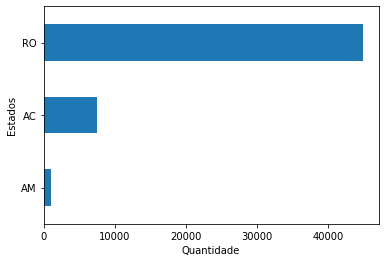

In [44]:
ax = dados_filtrados.groupby('uf').size().sort_values().plot.barh(
    figsize=fig_size
)
ax.set_xlabel('Quantidade')
ax = ax.set_ylabel('Estados')

#  TO-DO

In [47]:
print(
    f'Foram aplicadas um Total de {len(dados_filtrados)} provas em todo país.\n\r\
    {qtd_prova_nao_realizada_5SEM} alunos da 5ª série do Ensino Fundamental Não Participaram\n\r\
    {qtd_prova_nao_realizada_9SEM} alunos da 9ª série do Ensino Fundamental Não Estavam Presentes\n\r\
    {qtd_prova_nao_realizada_3EM} alunos do 3ª ano do Ensino Médio Não Fizeram a Prova'
)

Foram aplicadas um Total de 53327 provas em todo país.
    2668 alunos da 5ª série do Ensino Fundamental Não Participaram
    3999 alunos da 9ª série do Ensino Fundamental Não Estavam Presentes
    0 alunos do 3ª ano do Ensino Médio Não Fizeram a Prova


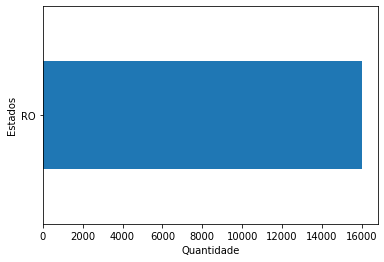

In [48]:
ax = dados_filtrados.query('serie == 9').groupby('uf').size().sort_values().plot(
    kind='barh',
    figsize=fig_size
)
ax.set_xlabel('Quantidade')
ax = ax.set_ylabel('Estados')

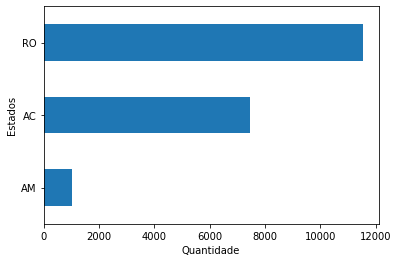

In [49]:
ax = dados_filtrados.query('serie == 3').groupby('uf').size().sort_values().plot(kind='barh',
    figsize=fig_size
)
ax.set_xlabel('Quantidade')
ax = ax.set_ylabel('Estados')

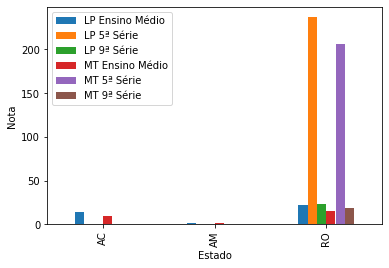

In [255]:
ax = dados_filtrados.groupby(['uf', 'serie'])[['nota_lp', 'nota_mt']].sum()\
.sort_values(by=['uf', 'serie']).unstack()\
.apply(
    lambda x: x / conta_tamanho_grupo(['uf', 'serie'], x.name)
)
ax = ax.plot(
    kind='bar',
    figsize=fig_size
)
ax.legend([
    'LP Ensino Médio', 'LP 5ª Série', 'LP 9ª Série',
    'MT Ensino Médio', 'MT 5ª Série', 'MT 9ª Série'
]
    , frameon=True
    , loc='best'
)
ax.set_ylabel('Nota')
ax = ax.set_xlabel('Estado')

### Média de Nota Disposta sobre os Estados

#### Médias Por Região

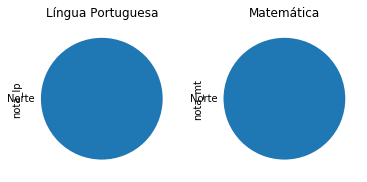

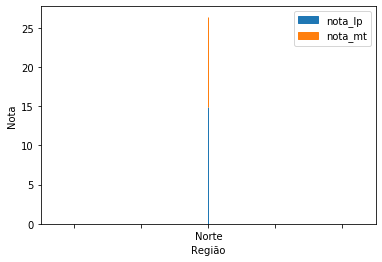

In [188]:
ax = dados_filtrados.groupby('regiao').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('regiao', x.name), axis=1
)

ax.plot.pie(
    subplots=True, figsize=fig_size,
    legend=False,
    title=['Língua Portuguesa', 'Matemática']
)

ax = ax.plot(
    kind='area',
    stacked=True
)
ax.set_ylabel('Nota')
ax = ax.set_xlabel('Região')


#### Por Estados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001453F523E48>,
      dtype=object)

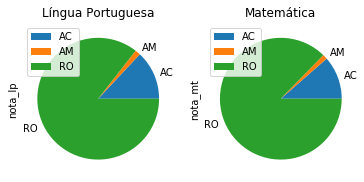

In [51]:
dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / len(dados_filtrados)
).plot.pie(subplots=True, figsize=fig_size, title=['Língua Portuguesa', 'Matemática'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001453F6557B8>,
      dtype=object)

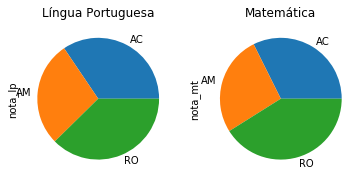

In [52]:
dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('uf', x.name), axis=1
).plot.pie(subplots=True, figsize=fig_size, legend=False, title=['Língua Portuguesa', 'Matemática'])

### Disparidades Entre Aprendizagem

### Média Geral de Notas

nota_lp    14.912052
nota_mt    11.493296
dtype: float64


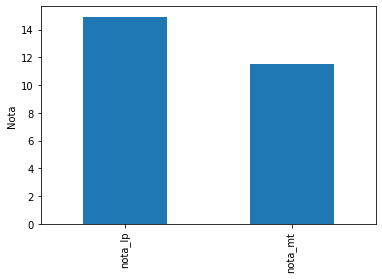

In [153]:
ax = dados_filtrados[['nota_lp', 'nota_mt']].mean()
print(ax)
ax = ax.plot(kind='bar')
ax = ax.set_ylabel('Nota')

### Por Gênero

           Língua Portuguesa  Matemática
sexo                                    
Feminino           15.507351   11.134921
Masculino          14.383306   12.000824


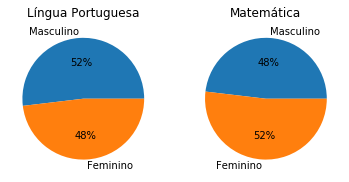

In [56]:
ax = dados_filtrados.groupby('sexo').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('sexo', x.name), axis=1
)
ax.columns = ['Língua Portuguesa', 'Matemática']
print(ax)
ax.columns = [None, None]
pl = ax.plot.pie(
    subplots=True, figsize=fig_size,
    autopct='%.0f%%',
    # labels=['Masculino', 'Feminino'],
    legend=False,
    title=['Língua Portuguesa', 'Matemática']
)


### Por Gênero e Estado

grupo ['uf', 'sexo'], grupo_buscado ('nota_lp', 'Feminino') type <class 'tuple'>
['Feminino', 'Masculino'] 
 uf  sexo     
AC  Feminino      3939
    Masculino     3252
AM  Feminino       506
    Masculino      436
RO  Feminino     22897
    Masculino    20572
dtype: int64
0 True
grupo ['uf', 'sexo'], grupo_buscado ('nota_lp', 'Masculino') type <class 'tuple'>
['Feminino', 'Masculino'] 
 uf  sexo     
AC  Feminino      3939
    Masculino     3252
AM  Feminino       506
    Masculino      436
RO  Feminino     22897
    Masculino    20572
dtype: int64
1 True
grupo ['uf', 'sexo'], grupo_buscado ('nota_mt', 'Feminino') type <class 'tuple'>
['Feminino', 'Masculino'] 
 uf  sexo     
AC  Feminino      3939
    Masculino     3252
AM  Feminino       506
    Masculino      436
RO  Feminino     22897
    Masculino    20572
dtype: int64
0 True
grupo ['uf', 'sexo'], grupo_buscado ('nota_mt', 'Masculino') type <class 'tuple'>
['Feminino', 'Masculino'] 
 uf  sexo     
AC  Feminino      3939
    Mascu

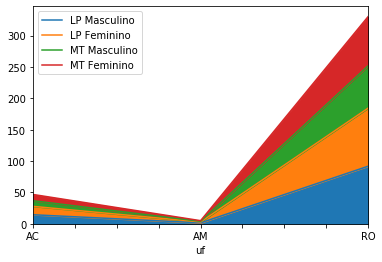

In [225]:
ax = dados_filtrados.groupby(['uf', 'sexo'])[['nota_lp', 'nota_mt']].sum().unstack()\
.apply(
    lambda x: x / conta_tamanho_grupo(['uf', 'sexo'], x.name)
).plot(
    kind='area', figsize=fig_size
)
ax.legend(['LP Masculino', 'LP Feminino', 'MT Masculino', 'MT Feminino'])